In [1]:
from copy import deepcopy
import datetime as dt
from IPython.display import HTML
import json
import pandas as pd
from arcgis.gis import GIS
import arcgis.network as network
import arcgis.geocoding as geocoding
from arcgis.features import FeatureLayer, FeatureSet, FeatureCollection
import arcgis.features.use_proximity as use_proximity

In [8]:
print("\n\nActive Portal in ArcGIS Pro")  
my_gis = GIS("pro")



Active Portal in ArcGIS Pro


<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>
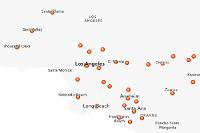

In [10]:
sample_cities = my_gis.content.search('title:"USA Major Cities" type:Feature Service owner:esri*', 
                                      outside_org=True)[0]
sample_cities

In [30]:
stops_cities = ['Colorado Springs', 'Dayton', 
                'New Orleans', 'Orlando', 'Fayetteville']
values = "'" + "', '".join(stops_cities) + "'"

In [31]:
stops_cities_fl = FeatureLayer(sample_cities.url + "/0")
type(stops_cities_fl)

arcgis.features.layer.FeatureLayer

In [33]:
stops_cities_fset = stops_cities_fl.query(where="ST in ('CO', 'OH', 'LA', 'FL', 'NC')  AND NAME IN ({0})".format(values), as_df=False)
stops_cities_fset

<FeatureSet> 5 features

In [34]:
start_cities_fset = stops_cities_fl.query(where="ST='CO' AND NAME = 'Colorado Springs'", as_df=False)
start_cities_fset

<FeatureSet> 1 features

In [35]:
print(list(map(lambda x: x.attributes['NAME'], stops_cities_fset)))

['Colorado Springs', 'New Orleans', 'Orlando', 'Fayetteville', 'Dayton']


In [61]:
%%time

start_time = int(dt.datetime.now().timestamp() * 1000)

#I opted to change "reorder stops" so that my original list order was maintained
result = network.analysis.find_routes(stops_cities_fset, time_of_day=start_time, 
                                      time_zone_for_time_of_day="UTC",
                                      preserve_terminal_stops="Preserve None",
                                      reorder_stops_to_find_optimal_routes=False,
                                      save_output_na_layer=True)

Wall time: 36.6 s


In [62]:
print("Is the tool executed successfully?", result.solve_succeeded)

Is the tool executed successfully? True


In [63]:
type(result)

arcgis.geoprocessing._support.ToolOutput

In [64]:
result.output_routes, result.output_stops, result.output_directions

(<FeatureSet> 1 features, <FeatureSet> 5 features, <FeatureSet> 158 features)

In [65]:
result.output_network_analysis_layer.url

'https://logistics.arcgis.com/arcgis/rest/directories/arcgisjobs/world/route_gpserver/j3999660e47da4e30adb5ca2bdd115c2b/scratch/_ags_gpna8159427f95f9468db9dbd8718b5398d3.lyr'

In [66]:
pd.set_option('display.max_rows', 500)
""" Access the output directions
"""
df = result.output_directions.sdf
df = df[["RouteName", "ArriveTime", "DriveDistance", "ElapsedTime", "Text"]].loc[df["RouteName"] == "Colorado Springs - Dayton"]
display(df) #I opted to display the entire dataframe instead of just the header

' Access the output directions\n'

,RouteName,ArriveTime,DriveDistance,ElapsedTime,Text
0,Colorado Springs - Dayton,2020-11-22 11:30:38.335999966,0.000000,0.000000,Start at Colorado Springs
1,Colorado Springs - Dayton,2020-11-22 11:30:38.335999966,0.047144,0.342355,Go east on E Vermijo Ave toward S El Paso St
2,Colorado Springs - Dayton,2020-11-22 11:30:58.877000093,0.098685,0.381562,Turn right on S El Paso St
3,Colorado Springs - Dayton,2020-11-22 11:31:21.770999908,0.274904,0.610899,Turn right on E Costilla St
4,Colorado Springs - Dayton,2020-11-22 11:31:58.424000025,0.073842,0.210978,Turn left on S Wahsatch Ave
5,Colorado Springs - Dayton,2020-11-22 11:32:11.082999945,0.210737,0.802124,Turn right on E Cimarron St
6,Colorado Springs - Dayton,2020-11-22 11:32:56.486000061,0.843595,1.874659,Turn left on S Nevada Ave (US-85 S)
7,Colorado Springs - Dayton,2020-11-22 11:34:51.690000057,0.010277,0.027000,Turn left
8,Colorado Springs - Dayton,2020-11-22 11:34:53.309999943,148.548798,127.964355,Take the ramp and go on I-25 S (US-24 E)
9,Colorado Springs - Dayton,2020-11-22 13:34:29.391000032,0.000000,0.000000,Entering New Mexico


In [54]:
#print(type(df))  #debug statement for me

<class 'pandas.core.frame.DataFrame'>


In [67]:
""" draw the route and stops with customized styles, symbologies, and popups
"""
styles = [    
    dict(selector="td", props=[("padding", "2px")]),
    dict(selector='.row_heading, .blank', props=[('display', 'none;')]),
    dict(selector='.col_heading, .blank', props=[('display', 'none;')])]

route_symbol = {
                    "type": "esriSLS",
                    "style": "esriSLSSolid",
                    "color": [128,0,128,90],
                    "width": 4
                }

stops_symbol = {"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                "url":"http://static.arcgis.com/images/Symbols/Basic/ShinyPin.png",
                "contentType":"image/png","width":24,"height":24}

start_symbol = {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS",
                "url":"http://static.arcgis.com/images/Symbols/AtoZ/redA.png",
                "contentType":"image/png","width":15.75,"height":21.75}

end_symbol = {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS",
              "url":"http://static.arcgis.com/images/Symbols/AtoZ/greenB.png",
              "contentType":"image/png","width":15.75,"height":21.75}

popup_route = {"title": "Route", 
               "content": df.style.set_table_styles(styles).render()}
popup_stop = {"title": "Stop {}", 
              "content": df.style.set_table_styles(styles).render()}

' draw the route and stops with customized styles, symbologies, and popups\n'

In [68]:
def check_curb_approach2(result):
    attributes = result.attributes
    return (attributes['ArriveCurbApproach'], attributes['DepartCurbApproach'])

In [69]:
map1 = my_gis.map('Texas, USA', zoomlevel=4)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [70]:
""" draw the route and stops with customized styles, symbologies, and popups
"""
for route in result.output_routes:
    map1.draw(route.geometry, popup_route, route_symbol)

sequence = 1
for stop in result.output_stops:
    
    stop_bool_tuple = check_curb_approach2(stop)
    if stop_bool_tuple[0] is None:
        # starting point
        symbol = start_symbol
    elif stop_bool_tuple[1] is None:
        # ending point
        symbol = end_symbol
    else:
        # by-passing point
        symbol = stops_symbol
        
    address = geocoding.reverse_geocode(stop.geometry)['address']['Match_addr']
    map1.draw(stop.geometry, 
              {"title": "Stop {}".format(sequence), 
               "content": address},
              symbol)
    sequence+=1

' draw the route and stops with customized styles, symbologies, and popups\n'

In [73]:
#save into a web map
item_properties = {
    "title": "Colorado Springs - Dayton",
    "tags" : "Routing",
    "snippet": " Route from Colorado Springs to Dayton",
    "description": "a web map of Route from COS to Dayton using network.RouteLayer.solve"
}

item = map1.save(item_properties)

In [74]:
item

<Item title:"Colorado Springs - Dayton" type:Web Map owner:erickson.k>